In [1]:
import os
import random


root = "/hadatasets/SYNTHIA-AL/"

train_segments = os.listdir(os.path.join(root, "train"))

train_segments = [
    os.path.join("train", s)
    for s in train_segments
    if os.path.isdir(os.path.join(root, "train", s))
]
random.shuffle(train_segments)
train_segments

val_segments = train_segments[int(len(train_segments) * 0.8) :]
train_segments = train_segments[: int(len(train_segments) * 0.8)]

len(train_segments), len(val_segments)

(142, 36)

In [2]:
from pathlib import Path
from tqdm.auto import tqdm


def get_runs(seg):
    return [p for p in os.listdir(seg) if os.path.isdir(os.path.join(seg, p))]


train_paths = []

for segment in tqdm(train_segments):
    seg_path = os.path.join(root, segment)
    runs = get_runs(seg_path)
    for run in runs:
        all_rgb = os.listdir(os.path.join(seg_path, run, "RGB"))
        rbg_indexes = [Path(img).stem for img in all_rgb]

        for index in rbg_indexes:
            image = os.path.join(segment, run, "RGB", f"{index}.png")
            depth = os.path.join(segment, run, "Depth", f"{index}.png")
            seg = os.path.join(segment, run, "SemSeg", f"{index}.png")
            train_paths.append({"image_l": image, "depth_l": depth, "seg_l": seg})

val_paths = []
for segment in tqdm(val_segments):
    seg_path = os.path.join(root, segment)
    runs = get_runs(seg_path)
    for run in runs:
        all_rgb = os.listdir(os.path.join(seg_path, run, "RGB"))
        rbg_indexes = [Path(img).stem for img in all_rgb]

        for index in rbg_indexes:
            image = os.path.join(segment, run, "RGB", f"{index}.png")
            depth = os.path.join(segment, run, "Depth", f"{index}.png")
            seg = os.path.join(segment, run, "SemSeg", f"{index}.png")
            val_paths.append({"image_l": image, "depth_l": depth, "seg_l": seg})


test_segments = [
    os.path.join("test", s)
    for s in os.listdir(os.path.join(root, "test"))
    if os.path.isdir(os.path.join(root, "train", s))
]

test_paths = []

for segment in tqdm(test_segments):
    seg_path = os.path.join(root, segment)
    runs = get_runs(seg_path)
    for run in runs:
        all_rgb = os.listdir(os.path.join(seg_path, run, "RGB"))
        rbg_indexes = [Path(img).stem for img in all_rgb]

        for index in rbg_indexes:
            image = os.path.join(segment, run, "RGB", f"{index}.png")
            depth = os.path.join(segment, run, "Depth", f"{index}.png")
            seg = os.path.join(segment, run, "SemSeg", f"{index}.png")

            test_paths.append({"image_l": image, "depth_l": depth, "seg_l": seg})

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

In [4]:
import json


all_paths = {'train':train_paths,'validation':val_paths,'test':test_paths}

with open('../configs/synthia_splits.json','x') as f:
    json.dump(all_paths,f)

In [29]:
img = cv2.imread(os.path.join(root, train_paths[3000]["depth_l"]),cv2.IMREAD_UNCHANGED)
img[...,2]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [161, 161, 161, ..., 156, 156, 156],
       [ 87,  87,  87, ...,  83,  83,  83],
       [ 15,  15,  15, ...,  10,  10,  10]], dtype=uint8)

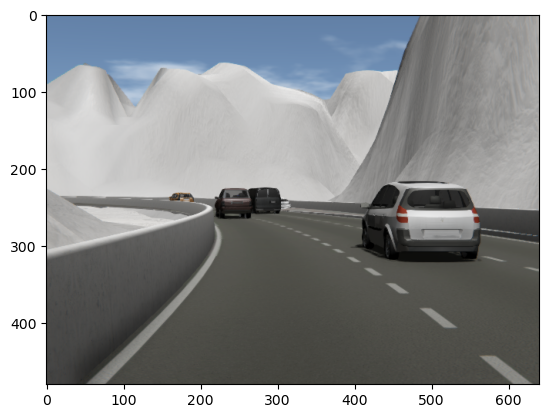

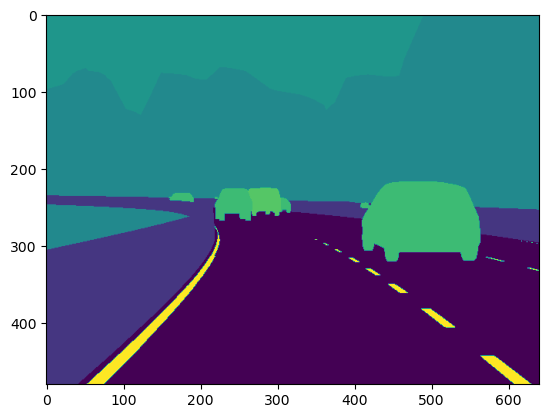

In [15]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

img = cv2.imread(os.path.join(root, train_paths[3000]["depth_l"]),-1)
# img = Image.open(os.path.join(root, train_paths[3000]["depth_l"]))
img = np.array(img).astype(np.float32)



seg = cv2.cvtColor(cv2.imread(os.path.join(root, train_paths[3000]["seg_l"]),cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGB)

plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(root, train_paths[3000]["image_l"]),cv2.IMREAD_UNCHANGED), cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(seg[...,0])


In [24]:
np.unique(seg[...,0])

array([ 1,  4, 10, 11, 14, 15, 20], dtype=uint8)